In [9]:
# L'objectif de ce script est de lire un document de sortie aspefm thermo et de formet un bar plot avec les temps d'exécution (comparaison entre ASPEFM et le temps passé dans l'extension)
# Pour cela il va falloir lire le fichier de sortie et extraire les informations nécessaires pour les afficher : le temps d'execution total et le temps passé dans l'extension
# L'idée est d'utiliser la librairie python et de faire un barplot avec matplotlib.
# l'ideé est d'aussi mettre en fond du bar plot le temps d'execution de aspefm sans extension pour comparer
# le bar plot aura en x les pourcentages d'intervalles utilisées et en y les temps d'execution

In [10]:
# 1. Importer les librairies nécessaires
import matplotlib.pyplot as plt
import numpy as np 



In [11]:
# 2. Lecture des fichiers de sortie

#----------------------- A modifier -----------------------
# sortir du dossier script et aller dans le dossier Carlson
path_folder_to_analyse = "../Carlson/" 
pourcentages = ['fixe',10,20,50,75,85,90,95,99]
path_without_extension = "carlson_2004_without_Thermo.txt"


path_extension1 = "carlson_2004_deltaG0_bornes_sabine_variable_"
path_extension2 = "carlson_2004_deltaG0_bornes_sabine_"
path_extension3 = "_pourcentage_range_10E7_1_default"

#----------------------------------------------------------

# Prendre les Bons noms de fichiers
liste_file_extraction = []
for i in pourcentages:
    print(i)
    if i == 'fixe':
        liste_file_extraction.append(path_folder_to_analyse+path_extension2+i+path_extension3+".txt")
        
    else:
        liste_file_extraction.append(path_folder_to_analyse+path_extension1+str(i)+path_extension3+".txt")
    
    
# Lecture du fichier de sortie

temps_execution = {} # Dictionnaire avec le pourcentage en clée et un couple de temps en valeur [temps_aspefm, temps_extension]

for i in range(len(liste_file_extraction)):
 

    file = open(liste_file_extraction[i], "r")
    lines = file.readlines()
    temps_aspefm = 0
    temps_extension = 0
    for line in lines:
        if "Time         :" in line:
            temps_aspefm = line.split(":")[1]
            # Exemple de la ligne : Time         : 25.590s (Solving: 24.65s 1st Model: 0.96s Unsat: 0.02s)
            # On prend le premier temps
            temps_aspefm = float(temps_aspefm.split("s")[0])
            
            
        if "Total time used by ThermoDGChecker:" in line:
            temps_extension = line.split(":")[1]
            # convertir en float
            temps_extension = float(temps_extension.split("s")[0])
            
            
    temps_execution[pourcentages[i]] = [temps_aspefm, temps_extension]
    file.close()
    
    
# Cas exceptionnel pour le fichier sasn extension
open_file = open(path_folder_to_analyse+path_without_extension, "r")
lines = open_file.readlines()
temps_aspefm = 0
for line in lines:
    if "Time         :" in line:
        temps_aspefm = line.split(":")[1]
        # Exemple de la ligne : Time         : 25.590s (Solving: 24.65s 1st Model: 0.96s Unsat: 0.02s)
        # On prend le premier temps
        temps_aspefm = float(temps_aspefm.split("s")[0])

temps_execution['without_thermo'] = [temps_aspefm, 0]
    
    
print(temps_execution)




fixe
10
20
50
75
85
90
95
99
{'fixe': [26.741, 8.96969], 10: [24.468, 8.30711], 20: [27.872, 8.93767], 50: [25.555, 9.13707], 75: [27.536, 9.22398], 85: [24.527, 8.65279], 90: [25.743, 8.64436], 95: [26.28, 8.85886], 99: [28.142, 8.97469], 'without_thermo': [15.564, 0]}


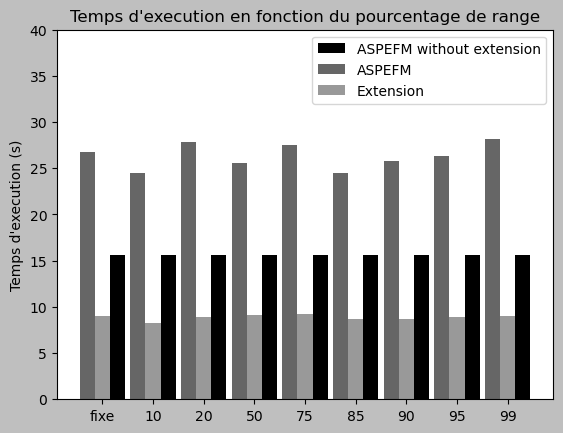

In [12]:
# 3. Création du bar plot

# On va créer un bar plot avec les temps d'execution en y et les pourcentages en x
# On va mettre en fond le temps d'execution de aspefm sans extension (Don con a trois bar par pourcentage)
# On va mettre en couleur les temps d'execution de aspefm et de l'extension

# On va créer un tableau de temps d'execution pour les bar plot
temps_aspefm = []
temps_extension = []
temps_aspefm_without = []

# for key in temps_execution.keys() sans le dernier élément
keys = list(temps_execution.keys())
# enlever le dernier élément
keys.pop()

for key in keys:
    temps_aspefm.append(temps_execution[key][0])
    temps_extension.append(temps_execution[key][1])
    temps_aspefm_without.append(temps_execution['without_thermo'][0])

# On va créer un tableau de pourcentage pour les bar plot
pourcentages = [str(i) for i in keys]

# On va créer un tableau de position pour les bar plot
position = np.arange(len(pourcentages))

# On va créer un tableau de largeur pour les bar plot
largeur = 0.3





# Création du bar plot
fig, ax = plt.subplots()
bar_aspefm_without = ax.bar(position+2*largeur, temps_aspefm_without, largeur, label='ASPEFM without extension')
bar_aspefm = ax.bar(position, temps_aspefm, largeur, label='ASPEFM')
bar_extension = ax.bar(position+largeur, temps_extension, largeur, label='Extension')



# Ajout des titres et des labels
ax.set_ylabel('Temps d\'execution (s)')
ax.set_title('Temps d\'execution en fonction du pourcentage de range')
ax.set_xticks(position+largeur)
ax.set_xticklabels(pourcentages)
ax.set_ylim(0, 40)
ax.legend()

plt.show()



{'aspefm_thermo_without_extension': [17.77131, 16.160890000000002, 18.93433, 16.41793, 18.312020000000004, 15.874210000000001, 17.098639999999996, 17.42114, 19.16731], 'extension': [8.96969, 8.30711, 8.93767, 9.13707, 9.22398, 8.65279, 8.64436, 8.85886, 8.97469]}
{'aspefm_thermo_without_extension': [15.564, 15.564, 15.564, 15.564, 15.564, 15.564, 15.564, 15.564, 15.564]}


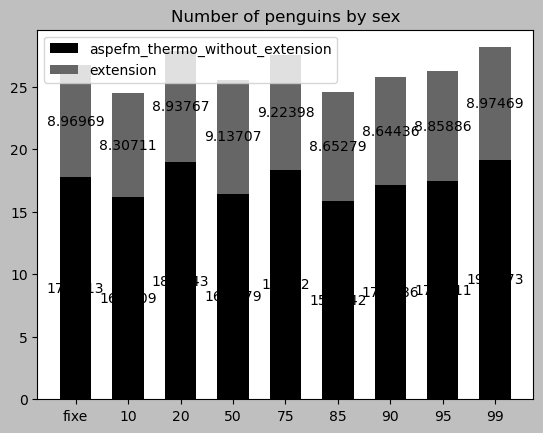

In [13]:
# création du deuxième bar plot

# species = ('Adelie', 'Chinstrap', 'Gentoo')
# sex_counts = {
#     'Male': np.array([73, 34, 61]),
#     'Female': np.array([73, 34, 58]),
# }
#
pourcentages = ['fixe',10,20,50,75,85,90,95,99]
pourcentages_str = [str(i) for i in pourcentages]

temps_aspefm_bare_plot = {
    'aspefm_thermo_without_extension': [],
    'extension': []
}


temps_aspefm_bare_plot_without_extension = {
    'aspefm_thermo_without_extension': [],

}

# Remplir le dictionnaire
for i in range(len(pourcentages)):
    temps_aspefm_total= temps_execution[pourcentages[i]][0]
    temps_aspefm_extension = temps_execution[pourcentages[i]][1]
    
    temps_aspefm_bare_plot['aspefm_thermo_without_extension'].append(temps_aspefm_total-temps_aspefm_extension)
    temps_aspefm_bare_plot['extension'].append(temps_aspefm_extension)
    temps_aspefm_bare_plot_without_extension['aspefm_thermo_without_extension'].append(temps_execution['without_thermo'][0])
    
print(temps_aspefm_bare_plot)
print(temps_aspefm_bare_plot_without_extension)

# faire le bar plot

width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(len(pourcentages))

for sex, sex_count in temps_aspefm_bare_plot.items():
    p = ax.bar(pourcentages_str, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

# Ajouter une ligne horizontale sur le bar plot pour le temps d'execution de aspefm sans extension




ax.set_title('Number of penguins by sex')
ax.legend()

plt.show()


In [14]:

# ---------------------- à modifier ---------------------
title = "Time execution of ASPEFM and extension for E.coli"
xlabel = "Percentage of range"
# --------------------------------------------------------








In [18]:
############################################### Création de fonction pour le script ###############################################

# ------------------ Lecture des fichier de sortie ----------------------------



def recup_path_fichiers(pourcentages,path_folder_to_analyse,path_extension1,path_extension2,path_extension3):
    '''
    Objectif : Prendre les bons noms de fichiers à partir des pourcentages
    
    Paramètres :
    pourcentages : liste des pourcentages (list)
    path_folder_to_analyse : chemin du dossier à analyser (str)
    path_extension1 : extension du fichier à analyser (str)
    path_extension2 : extension du fichier à analyser (str)
    path_extension3 : extension du fichier à analyser (str)
    
    Sortie : liste des fichiers à analyser (list)
    '''
    
    # Prendre les Bons noms de fichiers
    liste_file_extraction = []
    for i in pourcentages:
        print(i)
        if i == 'fixe':
            liste_file_extraction.append(path_folder_to_analyse+path_extension2+i+path_extension3+".txt")
            
        else:
            liste_file_extraction.append(path_folder_to_analyse+path_extension1+str(i)+path_extension3+".txt")
            
    return liste_file_extraction


def read_files(liste_file_extraction):
    '''
    Objectif : Lire les fichiers de sortie, disjontion de cas pour le path spécial ou on a pas d'extension de thermo
    
    Paramètres :
    liste_file_extraction : liste des fichiers à analyser (list)
    
    Sortie : dictionnaire avec les temps d'execution (dict)
    '''
    
    # Lecture du fichier de sortie

    temps_execution = {} # Dictionnaire avec le pourcentage en clée et un couple de temps en valeur [temps_aspefm, temps_extension]

    for i in range(len(liste_file_extraction)):


        file = open(liste_file_extraction[i], "r")
        lines = file.readlines()
        temps_aspefm = 0
        temps_extension = 0
        for line in lines:
            if "CPU Time     :" in line:
                temps_aspefm = line.split(":")[1]
                # Exemple de la ligne : Time         : 25.590s (Solving: 24.65s 1st Model: 0.96s Unsat: 0.02s)
                # On prend le premier temps
                temps_aspefm = float(temps_aspefm.split("s")[0])


            if "Total time used by ThermoDGChecker:" in line:
                temps_extension = line.split(":")[1]
                # convertir en float
                temps_extension = float(temps_extension.split("s")[0])


        temps_execution[pourcentages[i]] = [temps_aspefm, temps_extension]
        file.close()


    # Cas exceptionnel pour le fichier sans extension
    open_file = open(path_folder_to_analyse+path_without_extension, "r")
    lines = open_file.readlines()
    temps_aspefm = 0
    for line in lines:
        if "Time         :" in line:
            temps_aspefm = line.split(":")[1]
            # Exemple de la ligne : Time         : 25.590s (Solving: 24.65s 1st Model: 0.96s Unsat: 0.02s)
            # On prend le premier temps
            temps_aspefm = float(temps_aspefm.split("s")[0])

    temps_execution['without_thermo'] = [temps_aspefm, 0]


    print(temps_execution)
    return temps_execution


def read_file_computation(path_folder_to_analyse,pourcentages,path_without_extension,path_extension1,path_extension2,path_extension3) :
    
    # récupération de la liste de tous les fichier à analyser
    liste_file_extraction = recup_path_fichiers(pourcentages,path_folder_to_analyse,path_extension1,path_extension2,path_extension3)
        
    # Lecture des fichiers de sortie
    
    temps_execution = read_files(liste_file_extraction)
        
    print(temps_execution)
    return temps_execution



# ------------------      Pour les Bar plot  ----------------------------

def make_dico_bar_plot(temps_execution,pourcentages):
    '''
    Objet : Créer un dictionnaire avec les temps d'execution pour les bar plot
    
    Paramètres :
    temps_execution : dictionnaire avec les temps d'execution de aspefm et de l'extension (dict)
    pourcentages : liste des pourcentages (list)
    
    Sortie : dictionnaire avec les temps d'execution pour les bar plot (dict)
    '''


    temps_aspefm_bare_plot = {
        'aspefm + DGChecker': [],
        'aspefm alone': [],
        'DGChecker alone': []
        
    }


    # Remplir le dictionnaire
    for i in range(len(pourcentages)):
        temps_aspefm_total= temps_execution[pourcentages[i]][0]
        temps_aspefm_extension = temps_execution[pourcentages[i]][1]
        
        temps_aspefm_bare_plot['aspefm + DGChecker'].append(round(temps_aspefm_total,1))
        temps_aspefm_bare_plot['aspefm alone'].append(round(temps_aspefm_total-temps_aspefm_extension,1))
        temps_aspefm_bare_plot['DGChecker alone'].append(round(temps_aspefm_extension,1))
        

        
    return temps_aspefm_bare_plot


def bar_plot(temps_execution,title, ylabel, xlabel,pourcentages, name_file_save, echelle,plus_ligne):
    '''
    Objet : Créer un bar plot avec les temps d'execution en y et les pourcentages en x
    
    Paramètres :
    temps_execution : dictionnaire avec les temps d'execution de aspefm et de l'extension (y)
    title : titre du bar plot
    xlabel : label de l'axe x , pourcentage (list)
    
    
    Sortie : un bar plot
        
    '''
    
    pourcentages_str = [str(i) for i in pourcentages]
    
    

    temps_aspefm_bare_plot = make_dico_bar_plot(temps_execution,pourcentages)


    # faire le bar plot
    # width = 0.60  # the width of the bars
    
    # attribute = [ i for i in temps_aspefm_bare_plot.keys()]
    
    
    # print(temps_aspefm_bare_plot[attribute[0]])
    # attributeX1 = [i for i in range(len(temps_aspefm_bare_plot[attribute[0]]))]
    # x = np.arange(len(temps_aspefm_bare_plot[attribute[0]]))
    # plus_ligne2 = 0
    # for k in attributeX1:
    #     attributeX1[k] = attributeX1[k] + plus_ligne2
    #     x[k] = x[k] + plus_ligne2
    #     plus_ligne2 += 2
    
    # print('print attributeX1',attributeX1)
    # attributeX2 = [x + width for x in attributeX1]
    # attributeX3 = [x + width for x in attributeX2]
    
    # print('print attributeX2',attributeX2)
    # print('print attributeX3',attributeX3)  
    
    # fig, ax = plt.subplots()
    
    # rects = ax.bar(attributeX1, temps_aspefm_bare_plot[attribute[0]], width, label=attribute[0])
    # ax.bar_label(rects, padding=3, size = 4)
    
    # rects = ax.bar(attributeX2, temps_aspefm_bare_plot[attribute[1]], width, label=attribute[1])
    # ax.bar_label(rects, padding=3)
    
    # rects = ax.bar(attributeX3, temps_aspefm_bare_plot[attribute[2]], width, label=attribute[2])
    # ax.bar_label(rects, padding=3)
    
    
    

    


    x = np.arange(len(pourcentages_str))  # the label locations
    
    width = 0.25  # the width of the bars
    multiplier = 0


    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in temps_aspefm_bare_plot.items():
        print(attribute, measurement)
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, align='edge')
        ax.bar_label(rects, padding=3) # décaler les labels avec la droite
        multiplier += 1


        
        
        
 

    # rajouter une ligne horizontale pour le temps d'execution de aspefm sans extension en pointillé
    ax.axhline(temps_execution['without_thermo'][0], color='red', linewidth=4, label = 'aspefm with DGChecker off')
    # mettre le numéro du temps d'execution de aspefm sans extension
    ax.text(-0.4, temps_execution['without_thermo'][0]+plus_ligne, str(round(temps_execution['without_thermo'][0],2)), fontsize=8)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_xticks(x + width, pourcentages_str)
    ax.legend(loc='upper left', ncols=2)
    ax.set_ylim(0, echelle)
    plt.style.use('grayscale')
    plt.savefig(name_file_save)

    plt.show()
    
    
    
    
    # faire un barh plot
    fig, ax = plt.subplots()
    y = np.arange(len(pourcentages_str))
    width = 0.25  # the width of the bars
    multiplier = 0
    
    for attribute, measurement in temps_aspefm_bare_plot.items():
        print(attribute, measurement)
        offset = width * multiplier
        rects = ax.barh(y + offset, measurement, width, label=attribute, align='edge')
        ax.bar_label(rects, padding=3, size = 10) # décaler les labels avec la droite
        multiplier += 1
    
    # rajouter une ligne horizontale pour le temps d'execution de aspefm sans extension en pointillé
    ax.axvline(temps_execution['without_thermo'][0], color='red', linewidth=4, label = 'aspefm with DGChecker off')
    # mettre le numéro du temps d'execution de aspefm sans extension
    ax.text(temps_execution['without_thermo'][0]+plus_ligne, -0.4, str(round(temps_execution['without_thermo'][0],2)), fontsize=8)
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    
    # la légende est sur le graphique => on veut la mettre en dehors
    ax.legend(loc='best', bbox_to_anchor=(1, 1))
    ax.set_xlabel(ylabel)
    ax.set_ylabel(xlabel)
    ax.set_title(title)
    ax.set_yticks(y + width, pourcentages_str)
    ax.set_xlim(0, echelle)
    plt.style.use('grayscale')
    plt.savefig(name_file_save, bbox_inches='tight')
    # 
    plt.show()
    


fixe
10
20
50
75
85
90
95
99
{'fixe': [26.695, 8.96969], 10: [24.563, 8.30711], 20: [27.895, 8.93767], 50: [25.513, 9.13707], 75: [27.597, 9.22398], 85: [24.66, 8.65279], 90: [25.892, 8.64436], 95: [26.366, 8.85886], 99: [28.113, 8.97469], 'without_thermo': [15.564, 0]}
{'fixe': [26.695, 8.96969], 10: [24.563, 8.30711], 20: [27.895, 8.93767], 50: [25.513, 9.13707], 75: [27.597, 9.22398], 85: [24.66, 8.65279], 90: [25.892, 8.64436], 95: [26.366, 8.85886], 99: [28.113, 8.97469], 'without_thermo': [15.564, 0]}
aspefm + DGChecker [26.7, 24.6, 27.9, 25.5, 27.6, 24.7, 25.9, 26.4, 28.1]
aspefm alone [17.7, 16.3, 19.0, 16.4, 18.4, 16.0, 17.2, 17.5, 19.1]
DGChecker alone [9.0, 8.3, 8.9, 9.1, 9.2, 8.7, 8.6, 8.9, 9.0]


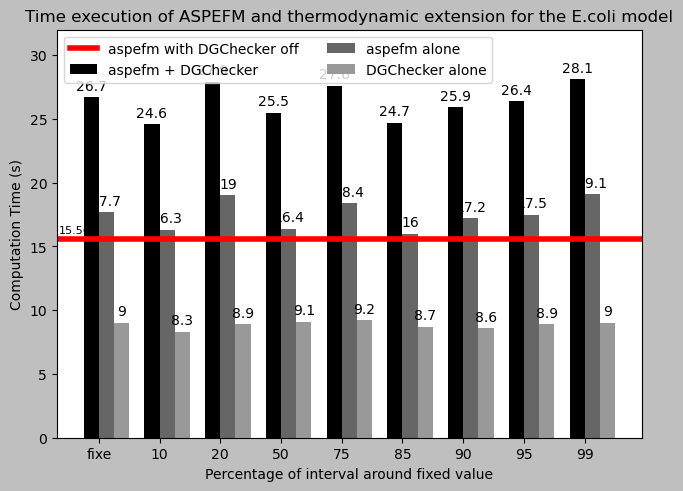

aspefm + DGChecker [26.7, 24.6, 27.9, 25.5, 27.6, 24.7, 25.9, 26.4, 28.1]
aspefm alone [17.7, 16.3, 19.0, 16.4, 18.4, 16.0, 17.2, 17.5, 19.1]
DGChecker alone [9.0, 8.3, 8.9, 9.1, 9.2, 8.7, 8.6, 8.9, 9.0]


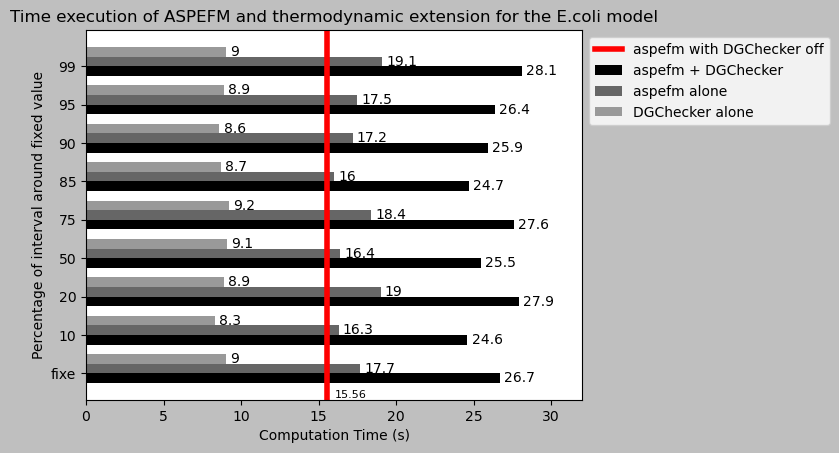

In [19]:
################################ SCRIPT FINAL ################################

# 1. Importer les librairies nécessaires
import matplotlib.pyplot as plt
import numpy as np


# CARLSON

# lecture des fichier de sortie

#----------------------- A modifier -----------------------
# sortir du dossier script et aller dans le dossier Carlson
path_folder_to_analyse = "../Carlson/" 
pourcentages = ['fixe',10,20,50,75,85,90,95,99]
path_without_extension = "carlson_2004_without_Thermo.txt"


path_extension1 = "carlson_2004_deltaG0_bornes_sabine_variable_"
path_extension2 = "carlson_2004_deltaG0_bornes_sabine_"
path_extension3 = "_pourcentage_range_10E7_1_default"

#----------------------------------------------------------

temps_execution = read_file_computation(path_folder_to_analyse,pourcentages,path_without_extension,path_extension1,path_extension2,path_extension3)

# Création du bar plot

# ---------------------- à modifier ---------------------
title = "Time execution of ASPEFM and thermodynamic extension for the E.coli model"
ylabel = "Computation Time (s)"
xlabel = "Percentage of interval around fixed value"
echelle = 32
plus_ligne = 0.5
# --------------------------------------------------------

bar_plot(temps_execution,title, ylabel, xlabel,pourcentages, "../Carlson/bar_plot_carlson.pdf",echelle,plus_ligne)






0
10
15
20
50
75
85
90
95
99
{0: [4.188, 8e-05], 10: [4.147, 9e-05], 15: [4.207, 8e-05], 20: [4.123, 7e-05], 50: [4.104, 0.00014], 75: [4.158, 8e-05], 85: [4.186, 8e-05], 90: [4.154, 8e-05], 95: [3.214, 0], 99: [4.274, 9e-05], 'without_thermo': [0.912, 0]}
{0: [4.188, 8e-05], 10: [4.147, 9e-05], 15: [4.207, 8e-05], 20: [4.123, 7e-05], 50: [4.104, 0.00014], 75: [4.158, 8e-05], 85: [4.186, 8e-05], 90: [4.154, 8e-05], 95: [3.214, 0], 99: [4.274, 9e-05], 'without_thermo': [0.912, 0]}


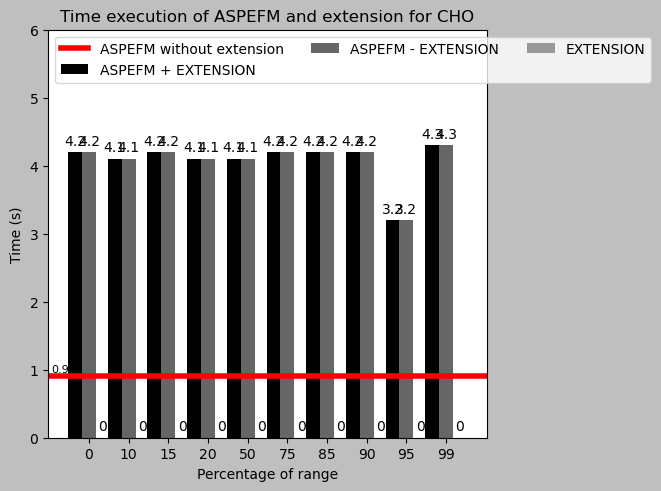

In [31]:
# MARIO

# lecture des fichier de sortie

#----------------------- A modifier -----------------------
# sortir du dossier script et aller dans le dossier Carlson
path_folder_to_analyse = "../Mario/t_72/" 
pourcentages = [0,10,15,20,50,75,85,90,95,99]
path_without_extension = "model_mario2013.txt"


path_extension1 = "model_mario2013_deltaG0_t_72_C_fixe_modifie_ext_"
path_extension2 = "model_mario2013_deltaG0_t_72_C_fixe_modifie_ext_"
path_extension3 = "_pourcents"

#----------------------------------------------------------

temps_execution = read_file_computation(path_folder_to_analyse,pourcentages,path_without_extension,path_extension1,path_extension2,path_extension3)

# Création du bar plot

# ---------------------- à modifier ---------------------
title = "Time execution of ASPEFM and extension for CHO"
ylabel = "Time (s)"
xlabel = "Percentage of range"
echelle = 6
plus_ligne = 0.05
# --------------------------------------------------------

bar_plot(temps_execution,title, ylabel, xlabel,pourcentages, "../Mario/bar_plot_mario.pdf",echelle, plus_ligne)